# Student Grade Regression - Math - Decision Tree Regression

## Import base libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data preprocessing

In [2]:
df = pd.read_csv('student-mat.csv')  # Math class
# df = pd.read_csv('student-por.csv')  # Portuguese class
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

print(X.shape, y.shape)

(395, 32) (395,)


In [3]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
# Identify all categorical columns
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [6]:
# Identify all numerical columns
obj_df = df.select_dtypes(include=['int64']).copy()
obj_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [7]:
# Check for missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
# Categorical Columns (indices) - 0:1, 3:5, 8:11, 15:22
from sklearn.preprocessing import LabelEncoder

# Label Encode - 0:1, 3:5, 15:22
le = LabelEncoder()

# Encode nominal attributes
X[:, 0] = le.fit_transform(X[:, 0])
X[:, 1] = le.fit_transform(X[:, 1])
X[:, 3] = le.fit_transform(X[:, 3])
X[:, 4] = le.fit_transform(X[:, 4])
X[:, 5] = le.fit_transform(X[:, 5])
X[:, 8] = le.fit_transform(X[:, 8])
X[:, 9] = le.fit_transform(X[:, 9])
X[:, 10] = le.fit_transform(X[:, 10])
X[:, 11] = le.fit_transform(X[:, 11])

# Encode binary attributes
X[:, 15] = le.fit_transform(X[:, 15])
X[:, 16] = le.fit_transform(X[:, 16])
X[:, 17] = le.fit_transform(X[:, 17])
X[:, 18] = le.fit_transform(X[:, 18])
X[:, 19] = le.fit_transform(X[:, 19])
X[:, 20] = le.fit_transform(X[:, 20])
X[:, 21] = le.fit_transform(X[:, 21])
X[:, 22] = le.fit_transform(X[:, 22])

print(X)

[[0 0 18 ... 6 5 6]
 [0 0 17 ... 4 5 5]
 [0 0 15 ... 10 7 8]
 ...
 [1 1 21 ... 3 10 8]
 [1 1 18 ... 0 11 12]
 [1 1 19 ... 5 8 9]]


In [9]:
# Split dataframe (df) into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [10]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [11]:
# Apply PCA (dimensionality reduction)
# from sklearn.decomposition import PCA

# pca = PCA(n_components=10)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

## Define Decision Tree model

In [12]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_split=4,
                            min_samples_leaf=5, max_features=31, random_state=0)

reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=31, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

## Evaluate model

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict test set results
y_pred = reg.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
print('')

# Summarize results
print('MAE: %.3f' % (mean_absolute_error(y_test, y_pred)))
print('MSE: %.3f' % (mean_squared_error(y_test, y_pred)))
print('RMSE: %.3f' % (mean_squared_error(y_test, y_pred, squared=False)))
print('R^2 Score: %.3f' % (r2_score(y_test, y_pred)))


[[12.75 14.  ]
 [11.36 10.  ]
 [10.25  9.  ]
 [13.78 15.  ]
 [15.31 16.  ]
 [12.75 12.  ]
 [13.56 14.  ]
 [10.75 11.  ]
 [ 9.23  9.  ]
 [14.44 15.  ]
 [ 9.23 10.  ]
 [11.68 11.  ]
 [11.36 10.  ]
 [ 9.23  8.  ]
 [13.78 15.  ]
 [12.75 14.  ]
 [12.75 12.  ]
 [10.25  0.  ]
 [ 9.23 10.  ]
 [13.78 16.  ]
 [ 6.4   0.  ]
 [ 5.29  0.  ]
 [ 6.4   8.  ]
 [13.78 16.  ]
 [12.75 12.  ]
 [15.31 15.  ]
 [10.25 10.  ]
 [18.56 19.  ]
 [ 5.29  0.  ]
 [13.56 14.  ]
 [ 5.29  0.  ]
 [ 8.47 10.  ]
 [ 9.23  8.  ]
 [ 6.6   4.  ]
 [12.75 13.  ]
 [10.25 10.  ]
 [12.75 13.  ]
 [17.4  18.  ]
 [ 9.23  8.  ]
 [11.68 11.  ]
 [ 5.29  6.  ]
 [17.4  18.  ]
 [ 8.47  8.  ]
 [ 8.47  8.  ]
 [10.25 11.  ]
 [ 5.29  0.  ]
 [11.68 13.  ]
 [ 5.29  0.  ]
 [11.68 13.  ]
 [ 8.47  7.  ]
 [ 9.23 10.  ]
 [17.4  18.  ]
 [10.75 10.  ]
 [ 9.23  9.  ]
 [11.68 11.  ]
 [ 9.23  6.  ]
 [ 9.23  9.  ]
 [12.75 13.  ]
 [13.78 15.  ]
 [13.56 14.  ]
 [12.75 14.  ]
 [13.56 15.  ]
 [12.75 14.  ]
 [13.78 15.  ]
 [ 9.23  0.  ]
 [13.78 15.  ]
 [17.4  19

<table border = "1">
  <thead>
    <th colspan = "5">Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>1.728</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>7.696</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>2.774</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.721</td>
    </tr>
  </tbody>
</table>

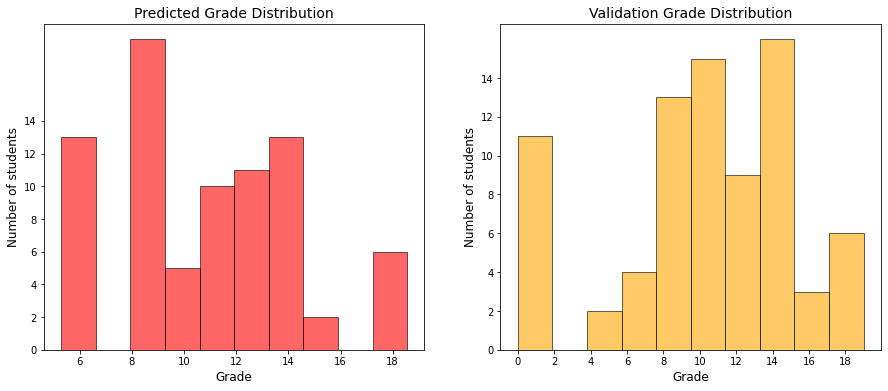

In [14]:
# Plot histogram for y_pred
fig1 = plt.figure(figsize=(15, 6))
ax1 = fig1.add_subplot(1, 2, 1)
plt.xticks(np.arange(0, 20, 2))
plt.yticks(np.arange(0, 16, 2))
plt.hist(x=y_pred, facecolor='red', alpha=0.6, edgecolor='black')
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of students', fontsize=12)
plt.title('Predicted Grade Distribution', fontsize=14)

# Plot histogram for y_test
ax1 = fig1.add_subplot(1, 2, 2)
plt.xticks(np.arange(0, 20, 2))
plt.yticks(np.arange(0, 16, 2))
plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of students', fontsize=12)
plt.title('Validation Grade Distribution', fontsize=14)

# Show subplot
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 1 --

R^2 Scoring:
Mean: 0.809476
Std: +/- 0.032745
Min: 0.762291
Max: 0.851024

RMSE Scoring:
Mean: 1.907504
Std: +/- 0.163686
Min: 1.702997
Max: 2.130598


-- Fold: 2 --

R^2 Scoring:
Mean: 0.822577
Std: +/- 0.048391
Min: 0.755451
Max: 0.896690

RMSE Scoring:
Mean: 1.829666
Std: +/- 0.262999
Min: 1.407754
Max: 2.162550


-- Fold: 3 --

R^2 Scoring:
Mean: 0.797831
Std: +/- 0.073378
Min: 0.699433
Max: 0.927608

RMSE Scoring:
Mean: 1.930600
Std: +/- 0.364216
Min: 1.153180
Max: 2.411019



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 4 --

R^2 Scoring:
Mean: 0.823581
Std: +/- 0.074240
Min: 0.633595
Max: 0.946933

RMSE Scoring:
Mean: 1.802353
Std: +/- 0.393200
Min: 1.046436
Max: 2.632707


-- Fold: 5 --

R^2 Scoring:
Mean: 0.841629
Std: +/- 0.091637
Min: 0.666401
Max: 0.952217

RMSE Scoring:
Mean: 1.670340
Std: +/- 0.477152
Min: 0.963399
Max: 2.501691



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 6 --

R^2 Scoring:
Mean: 0.802332
Std: +/- 0.114301
Min: 0.492024
Max: 0.955834

RMSE Scoring:
Mean: 1.870875
Std: +/- 0.554836
Min: 0.878979
Max: 3.094519


-- Fold: 7 --

R^2 Scoring:
Mean: 0.822187
Std: +/- 0.094471
Min: 0.590171
Max: 0.951138

RMSE Scoring:
Mean: 1.774821
Std: +/- 0.491109
Min: 0.922551
Max: 2.835953



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 8 --

R^2 Scoring:
Mean: 0.841801
Std: +/- 0.097871
Min: 0.619383
Max: 0.962315

RMSE Scoring:
Mean: 1.651792
Std: +/- 0.552281
Min: 0.856029
Max: 2.708069


-- Fold: 9 --

R^2 Scoring:
Mean: 0.840503
Std: +/- 0.105040
Min: 0.608488
Max: 0.962701

RMSE Scoring:
Mean: 1.655660
Std: +/- 0.604848
Min: 0.844227
Max: 2.884438



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class


-- Fold: 10 --

R^2 Scoring:
Mean: 0.868932
Std: +/- 0.092926
Min: 0.640953
Max: 0.972926

RMSE Scoring:
Mean: 1.483428
Std: +/- 0.574670
Min: 0.733312
Max: 2.730390



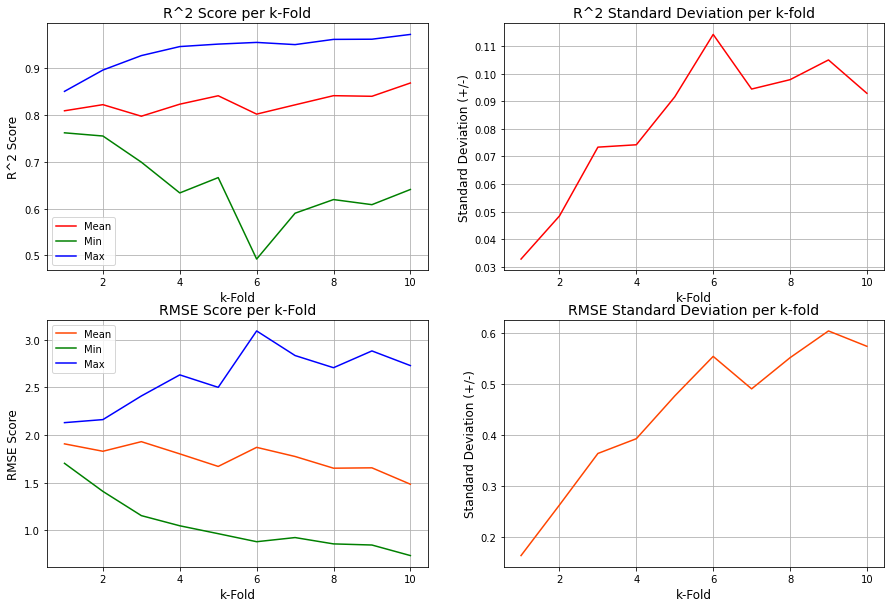

In [15]:
# Apply k-Fold Cross Validation on the training set
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Lists of values
r2_means, r2_stds, r2_mins, r2_maxs = [], [], [], []  # R^2 Scoring
rmse_means, rmse_stds, rmse_mins, rmse_maxs = [], [], [], []  # RMSE Scoring
# Cross validate for 10 k-folds, each with 3 repeats
for k in range(2, 12):
  cv = RepeatedStratifiedKFold(n_splits = k, n_repeats = 3, random_state = 0)
  r2_scores = cross_val_score(reg, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
  # scores = cross_val_score(reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  # scores = cross_val_score(reg, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  rmse_scores = cross_val_score(reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
  
  # Force scores to be positive
  r2_scores = abs(r2_scores)
  rmse_scores = abs(rmse_scores)

  # Print values
  print('')
  print('-- Fold: %d --' % (k-1))
  print('')
  print('R^2 Scoring:')
  print("Mean: %f" % (np.mean(r2_scores)))
  print("Std: +/- %f" % (np.std(r2_scores)))
  print("Min: %f" % (np.min(r2_scores)))
  print("Max: %f" % (np.max(r2_scores)))
  
  print('')
  print('RMSE Scoring:')
  print("Mean: %f" % (np.mean(rmse_scores)))
  print("Std: +/- %f" % (np.std(rmse_scores)))
  print("Min: %f" % (np.min(rmse_scores)))
  print("Max: %f" % (np.max(rmse_scores)))
  print('')
  
  # Append R^2 scores
  r2_means.append(np.mean(r2_scores))
  r2_stds.append(np.std(r2_scores))
  r2_mins.append(np.min(r2_scores))
  r2_maxs.append(np.max(r2_scores))
  
  # Append RMSE scores
  rmse_means.append(np.mean(rmse_scores))
  rmse_stds.append(np.std(rmse_scores))
  rmse_mins.append(np.min(rmse_scores))
  rmse_maxs.append(np.max(rmse_scores))

# Plot R^2 scores per k-fold:
fig2 = plt.figure(figsize=(15, 10))
ax1 = fig2.add_subplot(2, 2, 1)
ax1.plot(np.arange(1,11), r2_means, color='red', label='Mean')
ax1.plot(np.arange(1,11), r2_mins, color='green', label='Min')
ax1.plot(np.arange(1,11), r2_maxs, color='blue', label='Max')
ax1.set_xlabel('k-Fold', fontsize=12)
ax1.set_ylabel('R^2 Score', fontsize=12)
ax1.set_title('R^2 Score per k-Fold', fontsize=14)
ax1.legend()
ax1.grid(True)

# Plot R^2 Standard Deviations per k-fold:
ax2 = fig2.add_subplot(2, 2, 2)
ax2.plot(np.arange(1,11), r2_stds, color='red')
ax2.set_xlabel('k-Fold', fontsize=12)
ax2.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax2.set_title('R^2 Standard Deviation per k-fold', fontsize=14)
ax2.grid(True)

# Plot RMSE scores per k-fold:
ax3 = fig2.add_subplot(2, 2, 3)
ax3.plot(np.arange(1,11), rmse_means, color='orangered', label='Mean')
ax3.plot(np.arange(1,11), rmse_mins, color='green', label='Min')
ax3.plot(np.arange(1,11), rmse_maxs, color='blue', label='Max')
ax3.set_xlabel('k-Fold', fontsize=12)
ax3.set_ylabel('RMSE Score', fontsize=12)
ax3.set_title('RMSE Score per k-Fold', fontsize=14)
ax3.legend()
ax3.grid(True)

# Plot RMSE Standard Deviations per k-fold:
ax4 = fig2.add_subplot(2, 2, 4)
ax4.plot(np.arange(1,11), rmse_stds, color='orangered')
ax4.set_xlabel('k-Fold', fontsize=12)
ax4.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax4.set_title('RMSE Standard Deviation per k-fold', fontsize=14)
ax4.grid(True)

# Show subplot
plt.show()


<table border = "1">
  <thead>
    <th colspan = "3">Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.869</td>
      <td>1.483</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.093</td>
      <td>0.575</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.641</td>
      <td>0.733</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.973</td>
      <td>2.730</td>
    </tr>
  </tbody>
</table>

In [16]:
# Apply Grid Search for parameter tuning
from sklearn.model_selection import GridSearchCV

# param_dict = {'criterion': ['mse', 'mae'],
#               'max_depth': [10, 25, 50, 75, 100],
#               'min_samples_leaf': [2, 5, 10],
#               'min_samples_split': [2, 5, 10],
#               'max_features': [2, 5, 10, 15, 20, 25],
#               'random_state': [0, 1, 2]}


# R2 scoring
param_dict = {'max_depth': [4, 5],
              'min_samples_split': [4, 5],
              'min_samples_leaf': [4, 5],
              'max_features': [30, 31, 32],
              'random_state': [0, 1, 2, 3]}

# grid = GridSearchCV(reg, param_dict, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# grid = GridSearchCV(reg, param_dict, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# grid = GridSearchCV(reg, param_dict, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
grid = GridSearchCV(reg, param_dict, scoring='r2', cv=cv, n_jobs=-1)
results = grid.fit(X_train, y_train)

# Summarize results
best_score = grid.best_score_
best_parameters = grid.best_params_
print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R^2 Scoring
# print("Best Score: %.3f%%" % (np.abs(best_score)))  # RMSE
print("Best Parameters: ", best_parameters)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)


Best Score: 86.893%
Best Parameters:  {'max_depth': 5, 'max_features': 31, 'min_samples_leaf': 5, 'min_samples_split': 4, 'random_state': 0}


<table border = "1">
  <thead>
    <th colspan = "2">Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Best Score</b></td>
      <td>86.893%</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>criterion</b></td>
      <td>'mse'</td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>5</td>
    </tr>
    <tr>
      <td><b>max_features</b></td>
      <td>31</td>
    </tr>
    <tr>
      <td><b>min_samples_leaf</b></td>
      <td>5</td>
    </tr>
    <tr>
      <td><b>min_samples_split</b></td>
      <td>4</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
    </tr>
  </tbody>
</table>